# South African Language Identification Hackathon 2023

Team members:    

    
Mkhosi Kenny Myeni
    

<a id="cont"></a>

## Table of Contents


<a href=#three>1. Importing packages and Libraries</a>

<a href=#four>2. Data Loading and Preprocessing</a>

<a href=#five>3. Exploratory Data Analysis (EDA)</a>

<a href=#six>4. Feature Engineering</a>

<a href=#seven>5. Model Building</a>

<a href=#eight>6. Hyperparameter Tuning</a>

<a href=#nine>7. Model Evaluations</a>

<a href=#ten>8. Inference</a>

<a href=#eleven>9. Conclusion and Recommendations</a>

<a id="three"></a>
## 1. Importing packages and Libraries
<a href=#cont>Back to Table of Contents</a>
        
        Packages and libraries that we will use in the project

In [5]:
#Libraries for data loading, data manipulation
import numpy as np
import pandas as pd
#Libraries for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

import re

#Text processing libraries
import nltk
from nltk.corpus import stopwords
from html.parser import HTMLParser
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

#Ignore warnings during execution
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

from sklearn.model_selection import train_test_split

 

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression

from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Use\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Use\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Use\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Use\AppData\Roaming\nltk_data...


 <a id="four"></a>
## 2. Data Loading and Preprocessing
<a href=#cont>Back to Table of Contents</a>
    
    
        Importing the dataset containing tweet data.
        Cleaning and preparing the text data for analysis (removing special characters, stopwords, tokenization, etc.)

In [9]:
train = pd.read_csv('train_set.csv')
test = pd.read_csv('test_set.csv')
sample = pd.read_csv('sample_submission.csv')

In [7]:
train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [8]:
test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [69]:
sample.head()

,index,lang_id
0,1,tsn
1,2,nbl


Sample dataset is viewed so it be clear what the first two predictions should be 

In [12]:
print(train.shape)
print(test.shape)

(33000, 2)
(5682, 2)


The training dataset has 33000 rows and 2 columns, test dataset has 5682 rows and 2 columns

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   5682 non-null   int64 
 1   text    5682 non-null   object
dtypes: int64(1), object(1)
memory usage: 88.9+ KB


* Most of the features are non-numerical and will need to be processed using NLP tools and index is numerical.
* There are no missing values but will confirm by checking for null values.

<a id="five"></a>
## 3. Exploratory Data Analysis (EDA)
<a href=#cont>Back to Table of Contents</a>


    Statistical summary of the dataset for example Basic statistical insights (number of tweets)
    Visualization: Plotting word clouds, frequency distributions, or histograms to understand 
    the distribution of sentiments and most common tweets.

In [18]:
#check for missing values
print(train.isna().sum())
print(test.isna().sum())


lang_id    0
text       0
dtype: int64
index    0
text     0
dtype: int64


In [21]:
#check the shape of training dataset
train.shape

(33000, 2)

In [24]:
#check for unique values
train['lang_id'].value_counts()

lang_id
xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: count, dtype: int64

Shown is the number of languages and the total number of sentences in the dataset

In [23]:
#check for unique values
test['index'].value_counts()

index
1       1
3818    1
3794    1
3793    1
3792    1
       ..
1893    1
1892    1
1891    1
1890    1
5682    1
Name: count, Length: 5682, dtype: int64

<Axes: xlabel='lang_id', ylabel='count'>

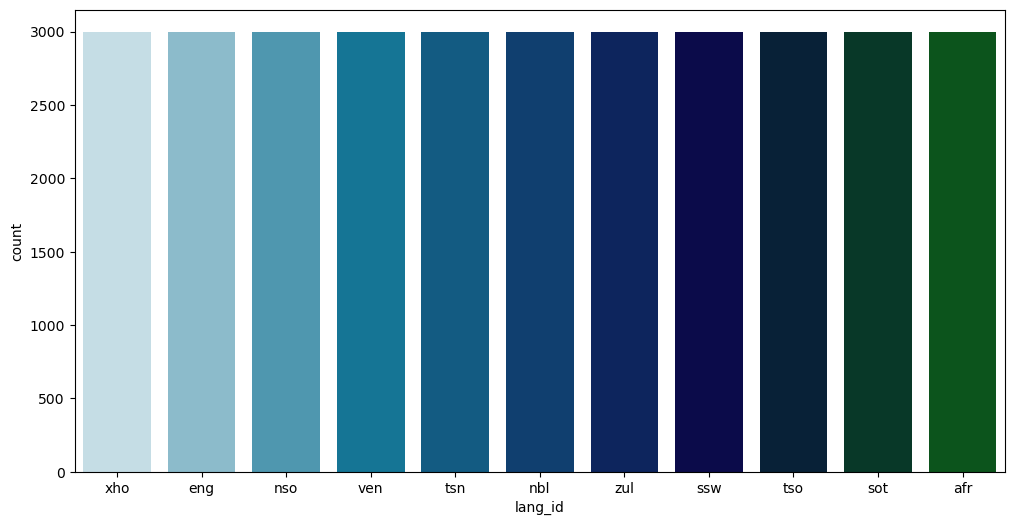

In [25]:
plt.figure(figsize=(12,6))
sns.countplot(x='lang_id', data=train, palette ='ocean_r')

Luckily all classes are evenly balanced, meaning predictive performance of models will be optimal


Next step is to classify independent and dependent variables, hence building the foundation for preprocessing

In [26]:
x = train['text']
y = train['lang_id']
x_ts = test['text']

<a id="six"></a>
## 4. Feature Engineering
<a href=#cont>Back to Table of Contents</a>    
    
    
        Extracting relevant features e.g Converting text data into a format suitable for machine learning models 


In [29]:
#check for rows with URL links
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
train.loc[train['text'].str.contains(pattern_url, regex=True )] 

,lang_id,text


No URL links are detected in train dataset

In [33]:
# creating a list for appending the preprocessed text
df_list = []
# iterating through all the text
for text in x:
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        # converting the text to lower case
        text = text.lower()
        # Tokenize the text
        tokens = word_tokenize(text)
        # Remove stopwords and white spaces
        stop_words = set(stopwords.words('english'))
        filtered_tokens = [word.strip() for word in tokens if word.lower() not in stop_words and not word.lower().startswith('rt')]
        # appending to data_list
        df_list.append(text)

In [34]:
# creating a list for appending the preprocessed text
df_listb = []
# iterating through all the text
for text in x_ts:
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        # converting the text to lower case
        text = text.lower()
        # Tokenize the text
        tokens = word_tokenize(text)
        # Remove stopwords and white spaces
        stop_words = set(stopwords.words('english'))
        filtered_tokens = [word.strip() for word in tokens if word.lower() not in stop_words and not word.lower().startswith('rt')]
        # appending to data_list
        df_list.append(text)

Both datasets are thoroughly cleaned based on defined variables

### Bag of words

The output and input feature should be of the numerical form so converting text into numerical form by using bag of words model using CountVectorizer is important

In [37]:
cv = CountVectorizer()
x = cv.fit_transform(x)

In [38]:
x.shape

(33000, 141958)

Transform is again used on test dataset because scaled parameters learned from the train data to scale the test data was used

In [39]:
x_ts = cv.transform(x_ts)
x_ts.shape

(5682, 141958)

The Features and Labels will be split into a training set, for training the Classification Model and the validation set, for model validation. This will require the use of the train_test_split() function of Scikit-Learn (sklearn). The parameter of this function will be used to set the random_state as well as the test_size. The latter refers to how much of the data will be used for testing the trained model. For this task, the test_size parameter will be set to 20% (0.2).

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=0)

<a id="seven"></a>
## 5. Model Building
<a href=#cont>Back to Table of Contents</a> 
    
        Model selection: Trying different classification models (e.g., Naive Bayes, 
        Support Vector Machines, Neural Networks) to determine the most suitable for 
        sentiment classification.Training and evaluation: Training the models on the 
        training set and evaluating their performance on the test set (using accuracy, precision, recall, F1-score, etc.). 

In [41]:
svc = SVC( kernel='rbf')
svc.fit(x_train, y_train)
y_pred4 = svc.predict(x_test)

#metrics report
acc = accuracy_score(y_test, y_pred4)
report = classification_report(y_test,y_pred4)

print("Accuracy is :",acc)
print("Report is :",report)

Accuracy is : 0.9940909090909091
Report is :               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       587
         eng       1.00      1.00      1.00       574
         nbl       0.99      0.98      0.98       613
         nso       1.00      0.99      1.00       570
         sot       1.00      0.99      1.00       600
         ssw       0.99      1.00      1.00       624
         tsn       0.99      1.00      1.00       581
         tso       1.00      1.00      1.00       597
         ven       1.00      1.00      1.00       599
         xho       0.99      0.99      0.99       621
         zul       0.97      0.98      0.98       634

    accuracy                           0.99      6600
   macro avg       0.99      0.99      0.99      6600
weighted avg       0.99      0.99      0.99      6600



In [45]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)# Creating a logistics regression
#fit the train data
LRmodel.fit(x_train, y_train)
#predict y labels
y_pred2 = LRmodel.predict(x_test)

#metrics report
acc = accuracy_score(y_test, y_pred2)
conf = confusion_matrix(y_test, y_pred2)
report = classification_report(y_test,y_pred2)

print("Accuracy is :",acc)
print("Report is :",report)

Accuracy is : 0.9953030303030304
Report is :               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       587
         eng       1.00      1.00      1.00       574
         nbl       0.99      0.99      0.99       613
         nso       1.00      1.00      1.00       570
         sot       1.00      0.99      1.00       600
         ssw       0.99      1.00      0.99       624
         tsn       1.00      1.00      1.00       581
         tso       1.00      1.00      1.00       597
         ven       1.00      1.00      1.00       599
         xho       1.00      0.99      0.99       621
         zul       0.98      0.98      0.98       634

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



In [73]:
from sklearn.naive_bayes import ComplementNB
Cmodel = ComplementNB()

#fitting the Naive_Bayes model
Cmodel.fit(x_train, y_train)

#predicting the y labels
y_pred1 = Cmodel.predict(x_test)

#metrics reporting
acc = accuracy_score(y_test, y_pred1)

report = classification_report(y_test,y_pred1)

print("Accuracy is :",acc)
#print("Matrix is :",cm)
print("Report is :",report)

Accuracy is : 0.9984848484848485
Report is :               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       587
         eng       0.99      1.00      0.99       574
         nbl       1.00      1.00      1.00       613
         nso       1.00      1.00      1.00       570
         sot       1.00      1.00      1.00       600
         ssw       1.00      1.00      1.00       624
         tsn       1.00      1.00      1.00       581
         tso       1.00      1.00      1.00       597
         ven       1.00      1.00      1.00       599
         xho       1.00      1.00      1.00       621
         zul       1.00      0.99      1.00       634

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



<a id="eight"></a>
## 6. Hyperparameter Tuning
<a href=#cont>Back to Table of Contents</a> 

    Optimizing model parameters: Performing grid search or random search
    to find the best hyperparameters for the chosen model(s).

<a id="nine"></a>
## 7. Model Evaluation
<a href=#cont>Back to Table of Contents</a> 
        
        Evaluating the final model(s) on various metrics to determine their effectiveness in classifying sentiments.

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac = accuracy_score(y_test, y_pred2)
cm = confusion_matrix(y_test, y_pred2)
print("Accuracy is :",ac)

Accuracy is : 0.9953030303030304


In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
matrix = confusion_matrix(y_test, y_pred2)
print('Confusion matrix: \n', matrix)

Confusion matrix: 
 [[587   0   0   0   0   0   0   0   0   0   0]
 [  0 573   0   0   0   1   0   0   0   0   0]
 [  0   0 606   0   0   1   0   0   0   0   6]
 [  0   0   0 570   0   0   0   0   0   0   0]
 [  0   0   0   1 597   0   2   0   0   0   0]
 [  0   0   0   0   0 624   0   0   0   0   0]
 [  0   0   0   0   0   0 581   0   0   0   0]
 [  0   0   0   0   0   0   0 597   0   0   0]
 [  0   0   0   0   0   0   0   0 599   0   0]
 [  0   0   2   0   0   0   0   0   0 614   5]
 [  0   0   5   0   0   5   0   0   0   3 621]]


In [79]:
#from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac = accuracy_score(y_test, y_pred1)
cm = confusion_matrix(y_test, y_pred1)
print("Accuracy is :",ac)

Accuracy is : 0.9984848484848485


In [80]:
matrix = confusion_matrix(y_test, y_pred1)
print('Confusion matrix: \n', matrix)

Confusion matrix: 
 [[587   0   0   0   0   0   0   0   0   0   0]
 [  0 574   0   0   0   0   0   0   0   0   0]
 [  0   1 611   0   0   0   0   1   0   0   0]
 [  0   0   0 570   0   0   0   0   0   0   0]
 [  0   0   0   0 600   0   0   0   0   0   0]
 [  0   0   0   0   0 624   0   0   0   0   0]
 [  0   0   0   1   0   0 580   0   0   0   0]
 [  0   0   0   0   0   0   0 597   0   0   0]
 [  0   0   0   0   0   0   0   0 599   0   0]
 [  0   0   1   0   0   0   0   0   0 620   0]
 [  0   5   0   0   0   0   0   0   0   1 628]]


In [81]:
ac = accuracy_score(y_test, y_pred4)
cm = confusion_matrix(y_test, y_pred4)
print("Accuracy is :",ac)

Accuracy is : 0.9940909090909091


In [82]:
matrix = confusion_matrix(y_test, y_pred4)
print('Confusion matrix: \n', matrix)

Confusion matrix: 
 [[585   0   0   0   0   2   0   0   0   0   0]
 [  0 573   0   0   0   1   0   0   0   0   0]
 [  0   0 601   0   0   0   0   0   0   0  12]
 [  0   0   0 567   0   0   2   0   0   1   0]
 [  0   0   0   1 597   0   2   0   0   0   0]
 [  0   0   0   0   0 623   0   0   0   0   1]
 [  0   0   0   1   0   0 580   0   0   0   0]
 [  0   0   0   0   0   0   0 597   0   0   0]
 [  0   0   0   0   0   0   0   0 599   0   0]
 [  0   0   2   0   0   0   0   0   0 615   4]
 [  0   1   5   0   0   1   0   0   0   3 624]]


In [52]:
x_ts.shape

(5682, 141958)

In [76]:
text_pred = Cmodel.predict(x_ts)

In [77]:
kaggle_upl = test[['index']]
kaggle_upl['lang_id'] = text_pred
kaggle_upl.to_csv('sample_submission.csv', index = None)

In [78]:
sub = pd.read_csv('sample_submission.csv')
sub.head()

,index,lang_id
0,1,tsn
1,2,nbl
2,3,ven
3,4,ssw
4,5,afr


<a id="eleven"></a>
## 8. Conclusion and Recommendations
<a href=#cont>Back to Table of Contents</a> 

    Summarizing findings: summarize the results obtained from the sentiment analysis.
    Recommendations: Providing insights or suggestions based on the analysis that could
    be beneficial for marketing strategies or further research.